# Model Analysis

Using this notebook to plot graphs and check out the performances of the different models we have tried

In [8]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shared_funcs import read_csv
from sklearn.metrics import roc_curve, auc

## Latest Model

Plot accuracy and loss over epochs

In [9]:
train_acc_file = './train_acc.csv'
train_loss_file = './train_loss.csv'
val_acc_file = './val_acc.csv'
val_loss_file = './val_loss.csv'

train_acc = [float(i) for i in read_csv(train_acc_file)]
train_loss = [float(i) for i in read_csv(train_loss_file)]
val_acc = [float(i) for i in read_csv(val_acc_file)]
val_loss = [float(i) for i in read_csv(val_loss_file)]

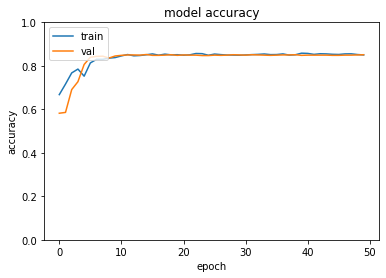

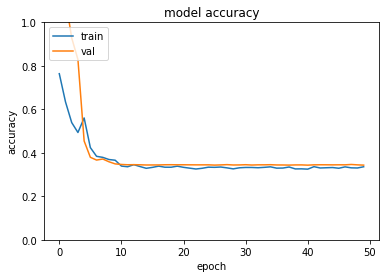

In [10]:
def simple_plot(list1, list2, title, y_lab, x_lab):
    plt.plot(list1)
    plt.plot(list2)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()

simple_plot(train_acc, val_acc, 'model_accuracy', 'accuracy', 'epoch')
simple_plot(train_loss, val_loss, 'model_loss', 'loss', 'epoch')

Plot ROC curve on test results

In [11]:
probabilities_file = './test_probabilities.csv'
y_test_file = './y_test.csv'
y_test = [int(i) == 2 for i in read_csv(y_test_file)]

probabilities = []
with open(probabilities_file) as f:
    reader = csv.reader(f)
    for line in reader:
        probabilities.append(line)
probabilities = np.array(probabilities).astype(float)

In [12]:
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 2])
roc_auc = auc(fpr, tpr)

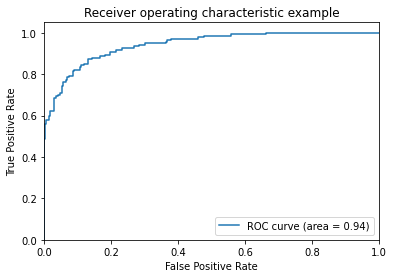

In [13]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()